In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [80]:
dataf= pd.read_csv("C:/Users/yldrm/Desktop/sislab-final/dataf/adult.csv")

In [81]:
dataf.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [82]:
dataf.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [83]:
dataf.shape

(48842, 15)

In [84]:
column_names = dataf.columns
column_names

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [85]:
dataf.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [86]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


VERİ TEMİZLEME

In [87]:
# "?" değerini Nan  değerlerle değişmek
dataf.replace(to_replace="?", value=None, inplace=True)

In [88]:
dataf.dropna(inplace=True)

In [89]:
dataf.duplicated().sum()

47

In [90]:
#Tekrar eden verileri kaldırmak
dataf.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [91]:
dataf["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [92]:
# educational-num değeri educationın numerik hali mi kontrol ediyoruz
column1_list = dataf['education'].tolist()
column2_list= dataf["educational-num"].tolist()
edu_num_mapping = {'11th': 7, 'HS-grad': 9, 'Assoc-acdm': 12,"Some-college":10, "10th": 6, 
       'Prof-school':15, '7th-8th':4, 'Bachelors':13, 'Masters':14, '5th-6th':3,
       'Assoc-voc':11, '9th':5, 'Doctorate':16, '12th':8, '1st-4th':2, "Preschool" :1 }
results = [num == edu_num_mapping[edu] for edu, num in zip(column1_list, column2_list)]
all(results)

True

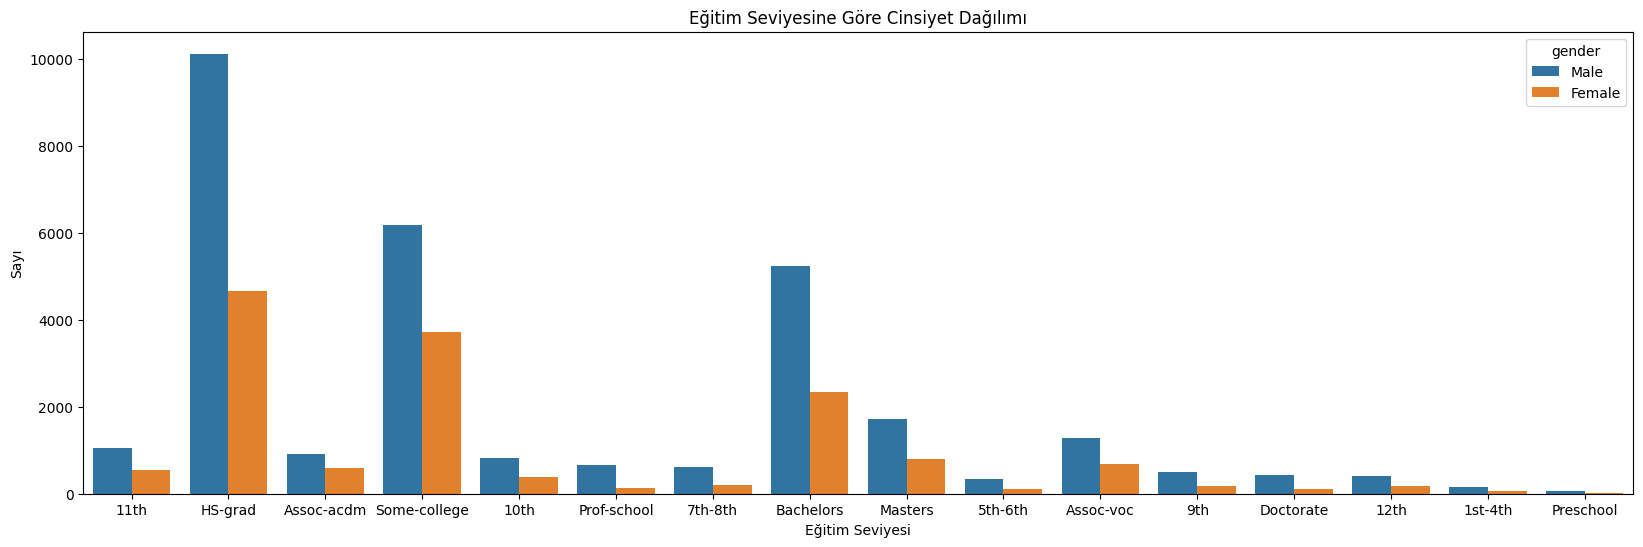

In [93]:
plt.figure(figsize=(20, 6))
sns.countplot(x='education', hue='gender', data=dataf)
plt.title('Eğitim Seviyesine Göre Cinsiyet Dağılımı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Sayı')
plt.show()

Text(0.5, 1.0, 'Erkeklerin Eğitim Durumu')

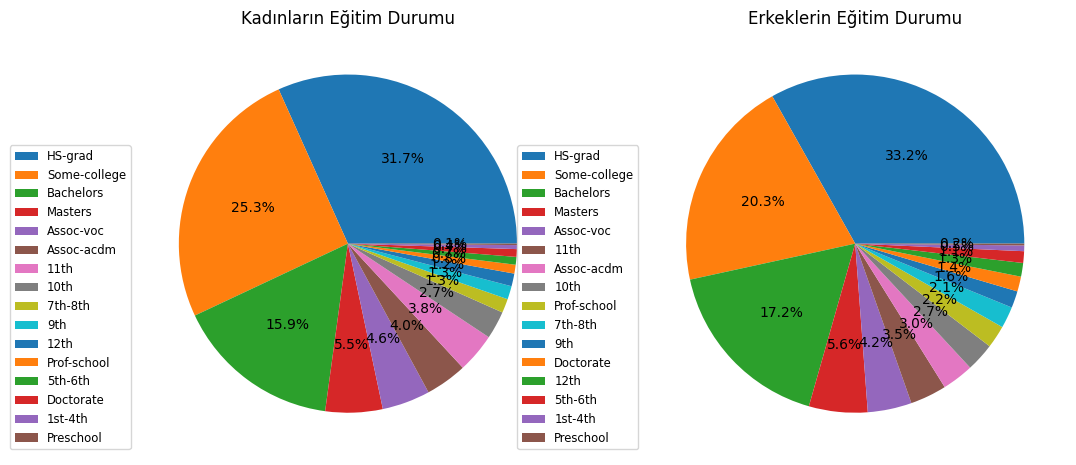

In [94]:
female_education_counts=dataf[dataf['gender'] == 'Female']['education'].value_counts()
male_education_counts = dataf[dataf['gender'] == 'Male']['education'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(female_education_counts, labels=None, autopct='%1.1f%%' )
axs[0].legend(labels=female_education_counts.index, loc="lower right", bbox_to_anchor=(0, 0), fontsize='small')
axs[0].set_title('Kadınların Eğitim Durumu')

axs[1].pie(male_education_counts, labels=None, autopct='%1.1f%%' )
axs[1].legend(labels=male_education_counts.index, loc="lower right", bbox_to_anchor=(0, 0), fontsize='small')
axs[1].set_title('Erkeklerin Eğitim Durumu')


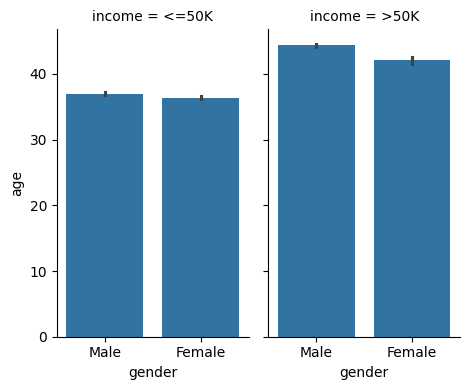

In [95]:
g = sns.FacetGrid(dataf, col="income", height=4, aspect=.6)
g.map(sns.barplot, "gender", "age", order=["Male", "Female"])

In [96]:
dataf["workclass"].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

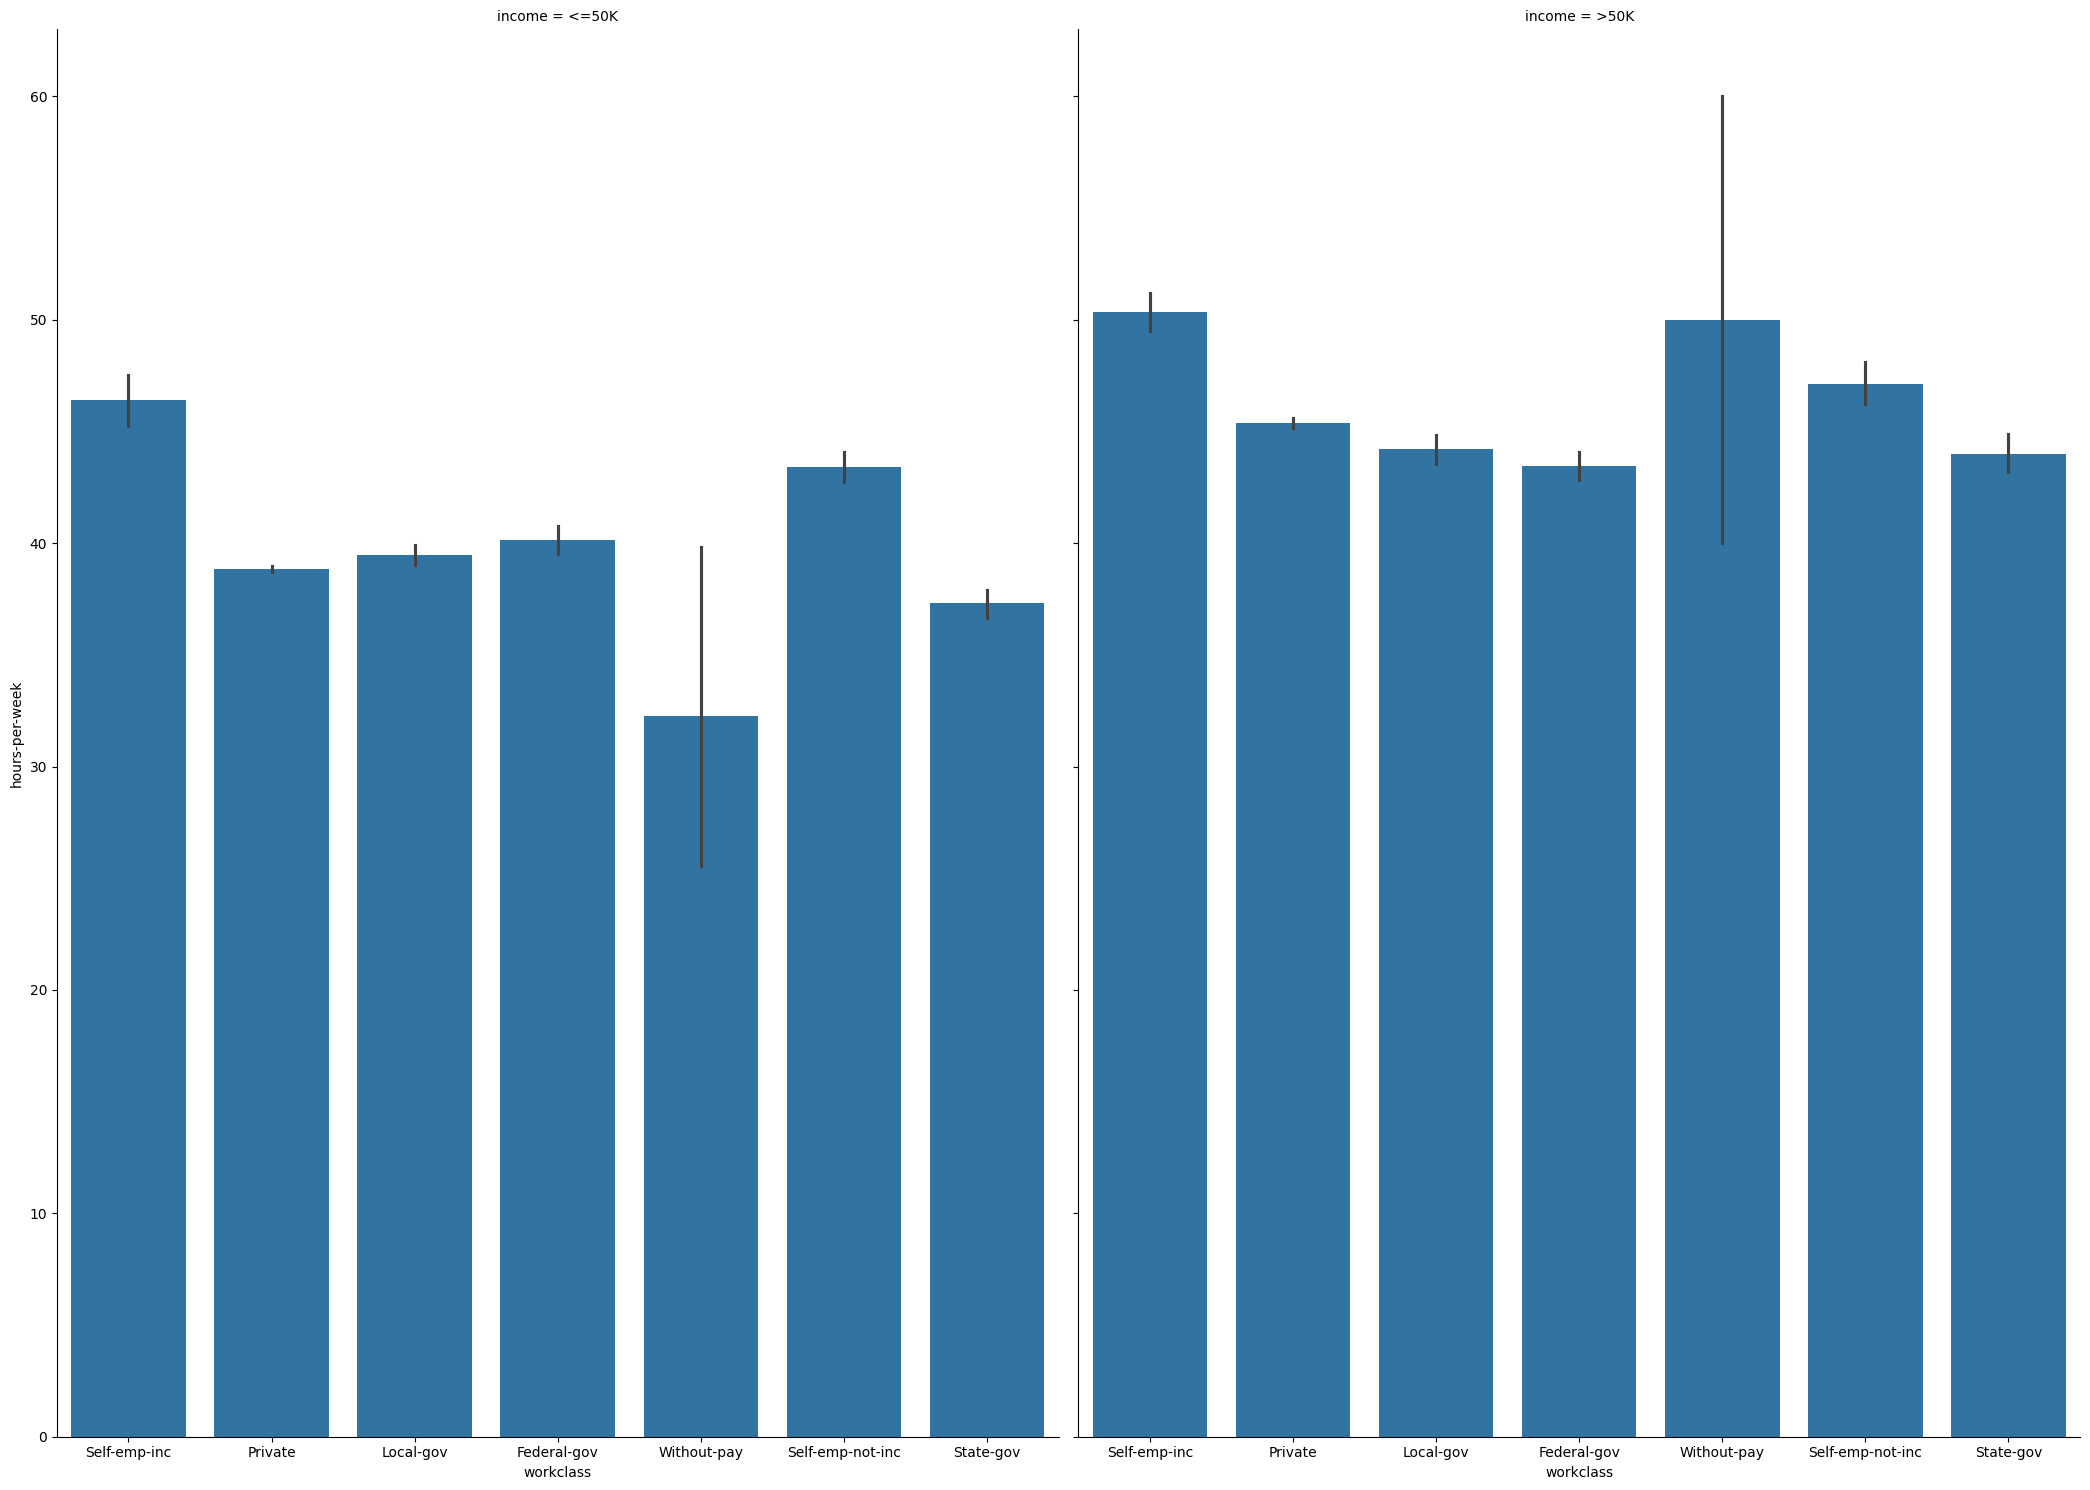

In [97]:
g = sns.FacetGrid(dataf, col="income", height=15, aspect=.7)
g.map(sns.barplot, "workclass", "hours-per-week", order=["Self-emp-inc", "Private","Local-gov","Federal-gov","Without-pay","Self-emp-not-inc","State-gov"])

In [98]:
dataf.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


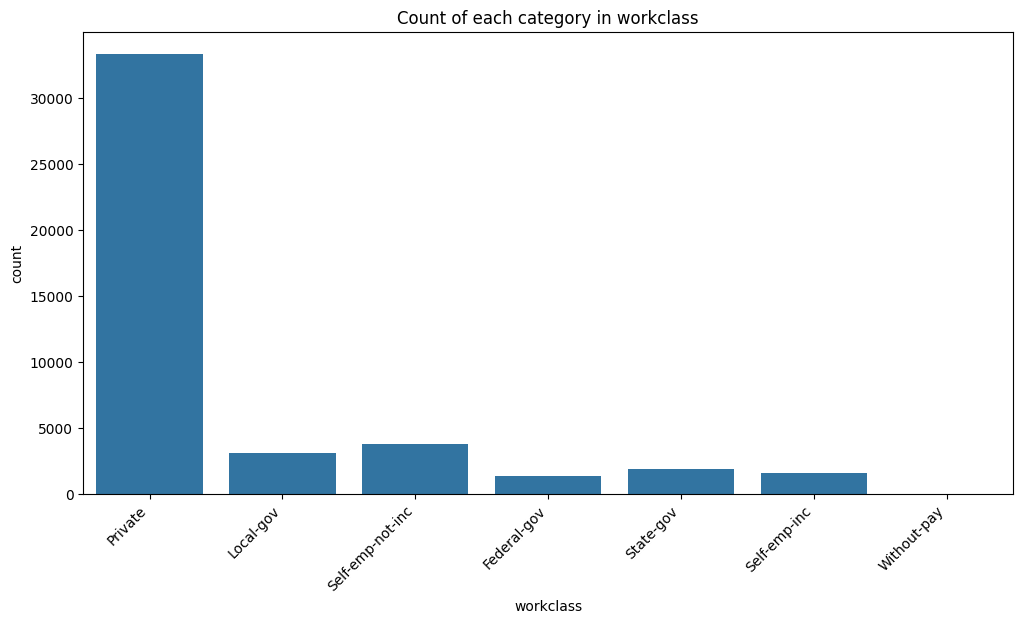

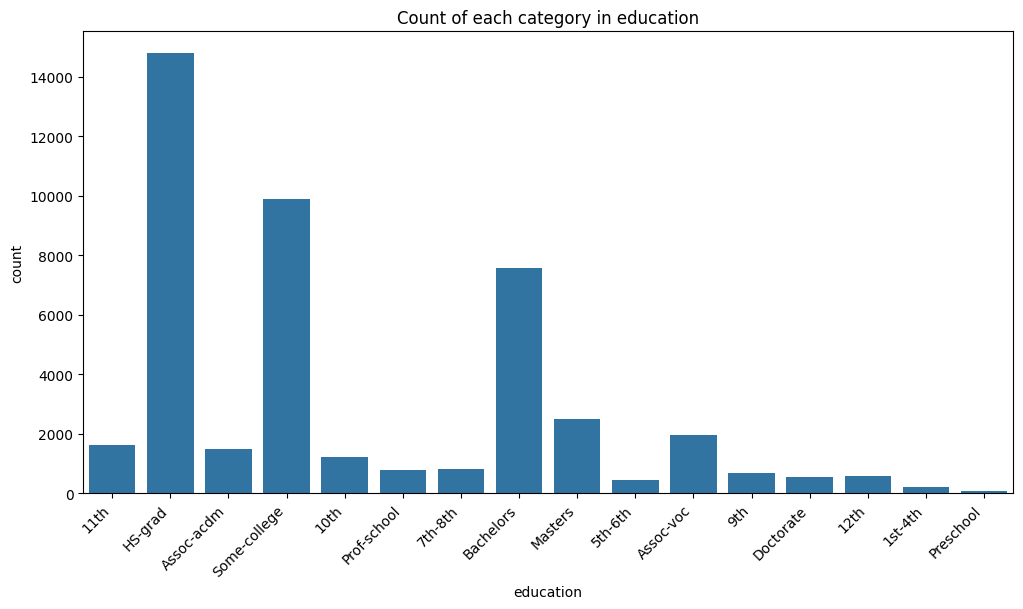

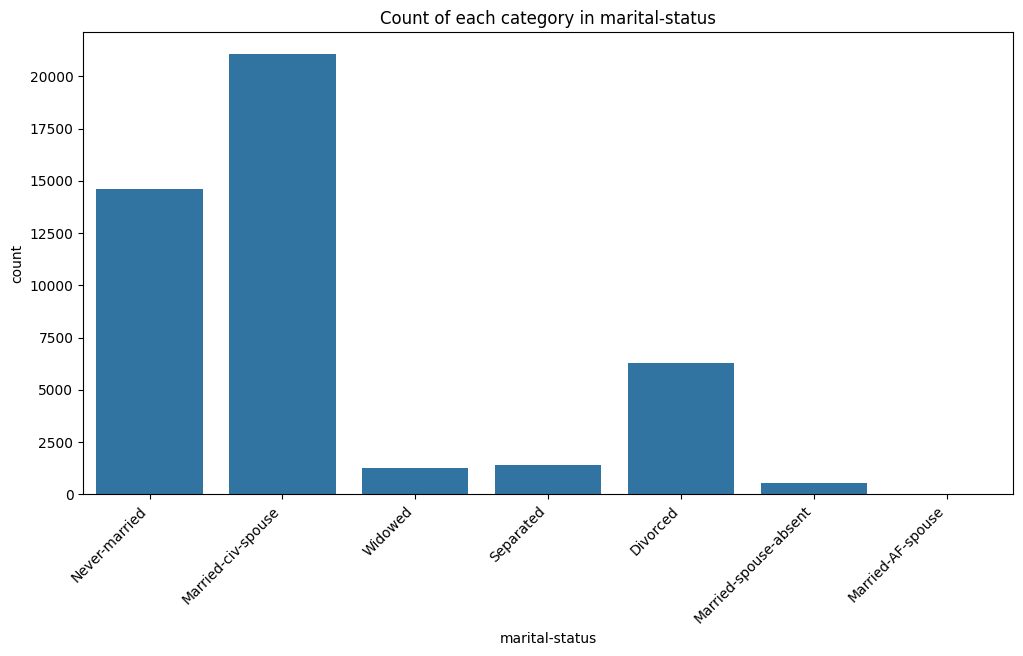

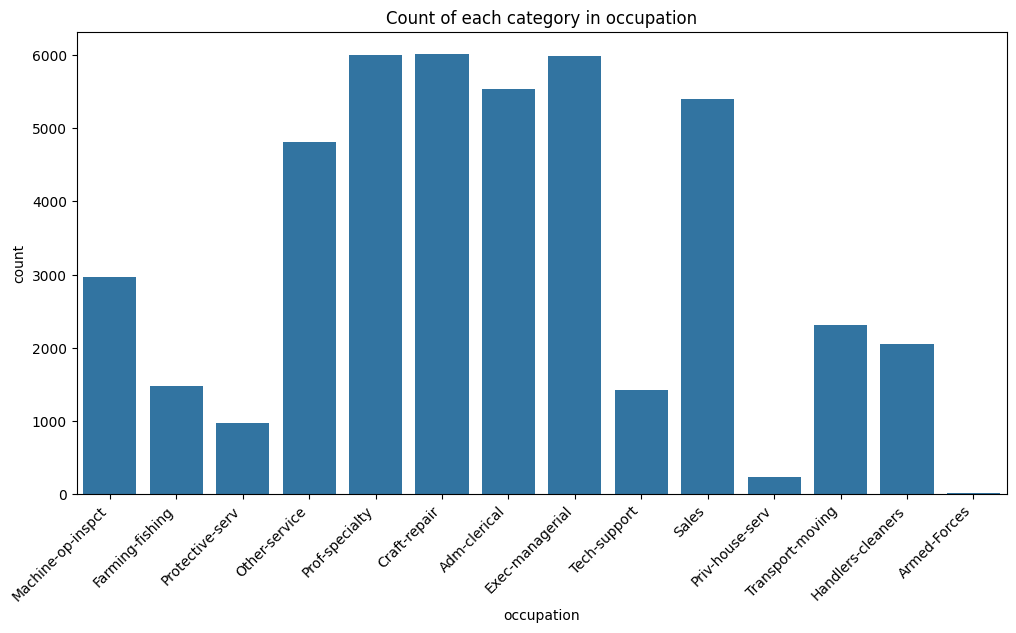

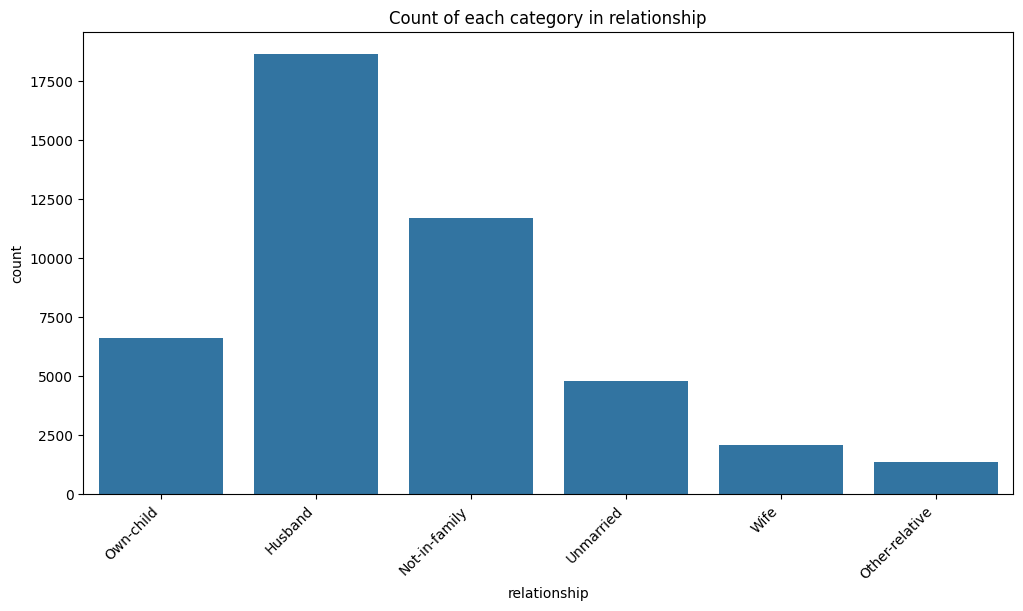

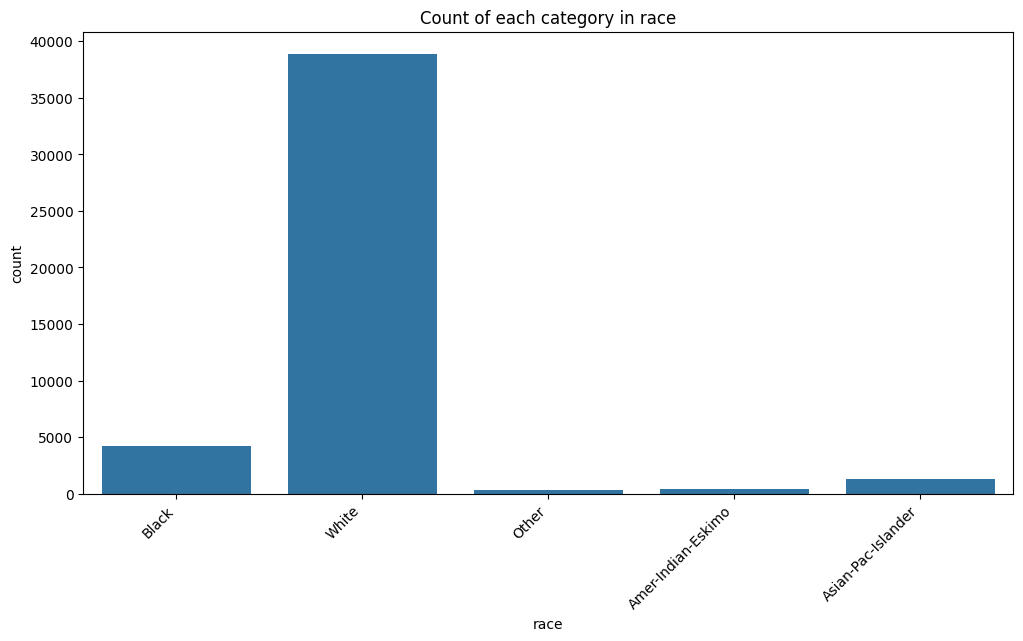

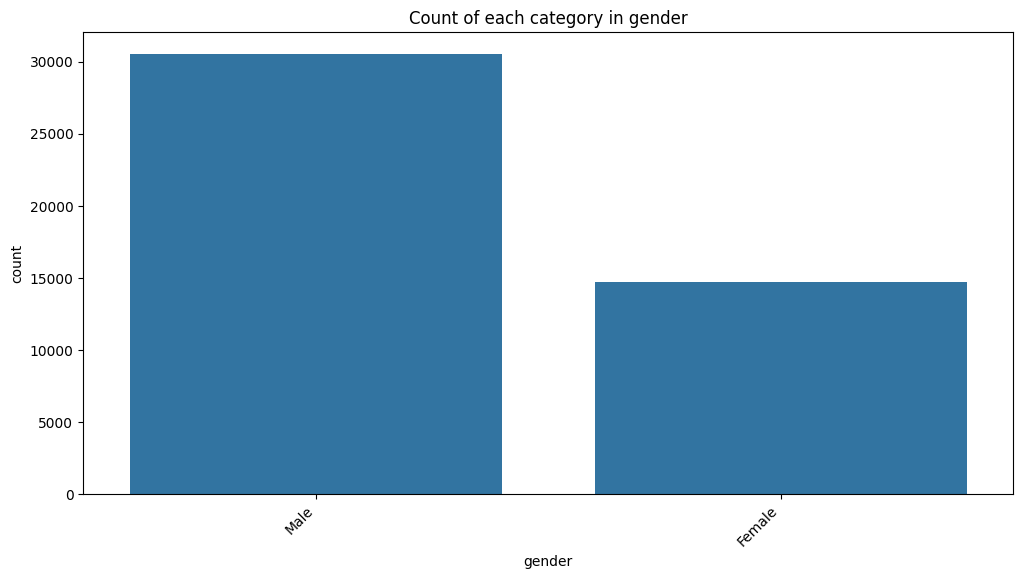

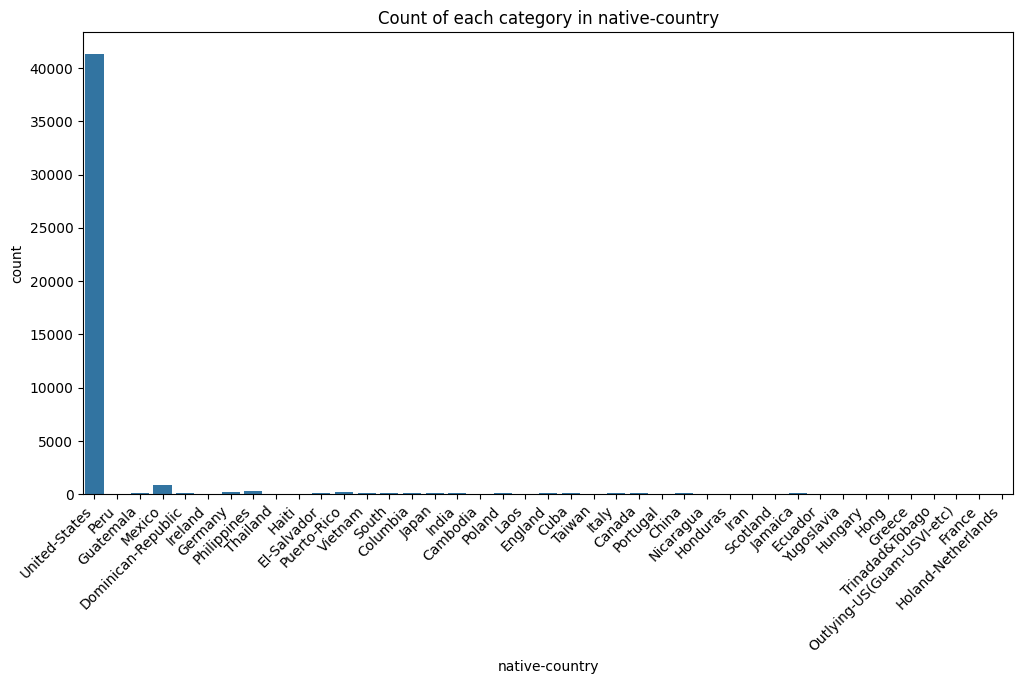

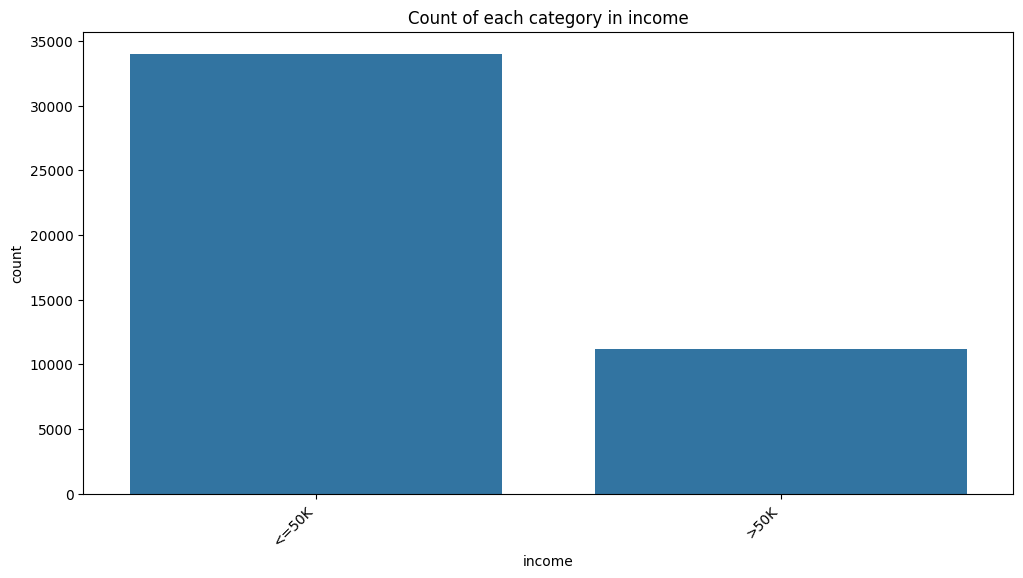

In [99]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataf, x=column)
    plt.title(f'Count of each category in {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


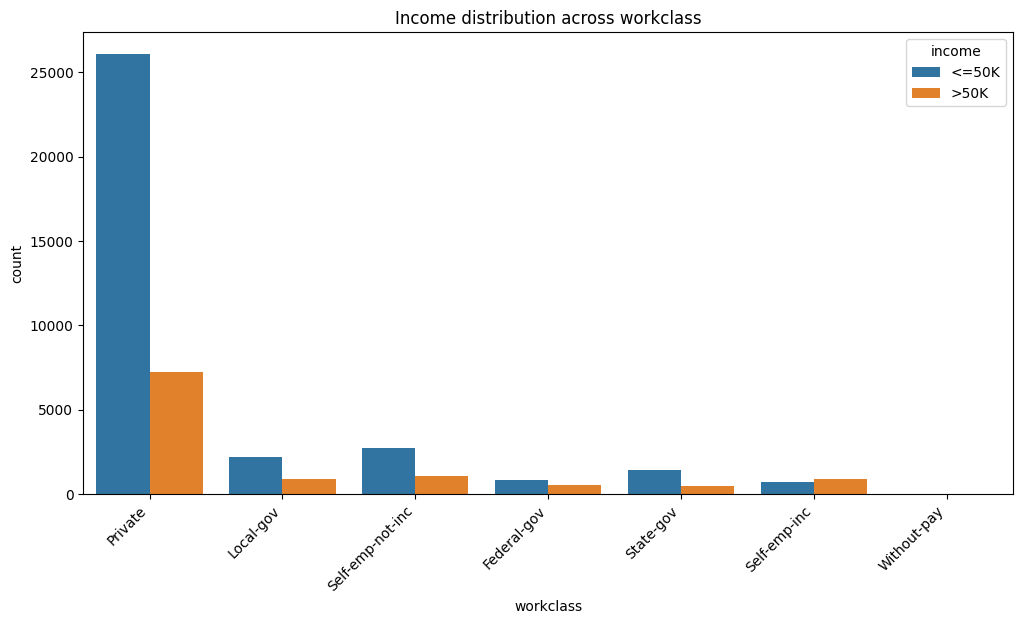

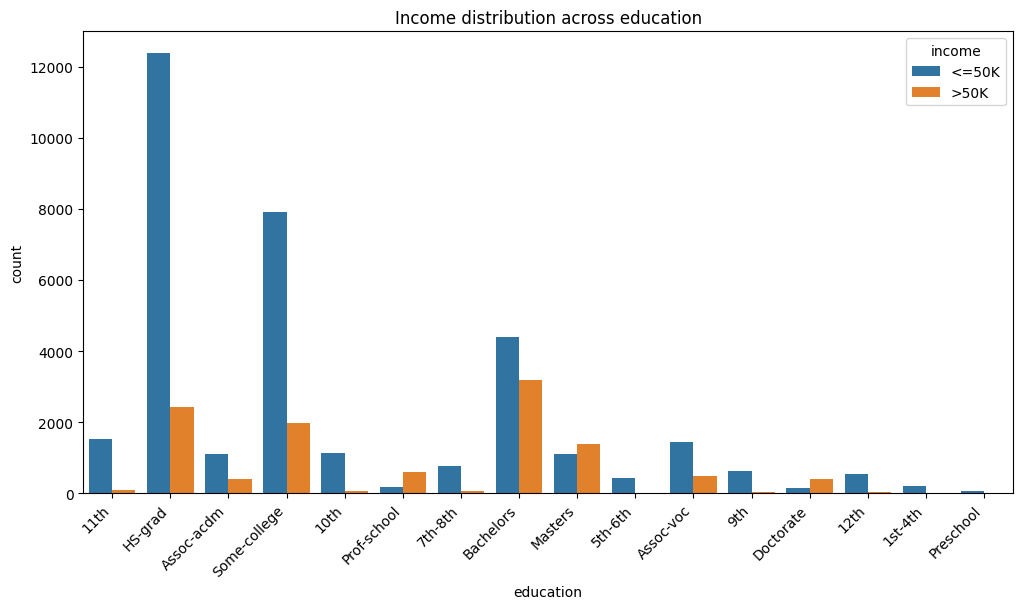

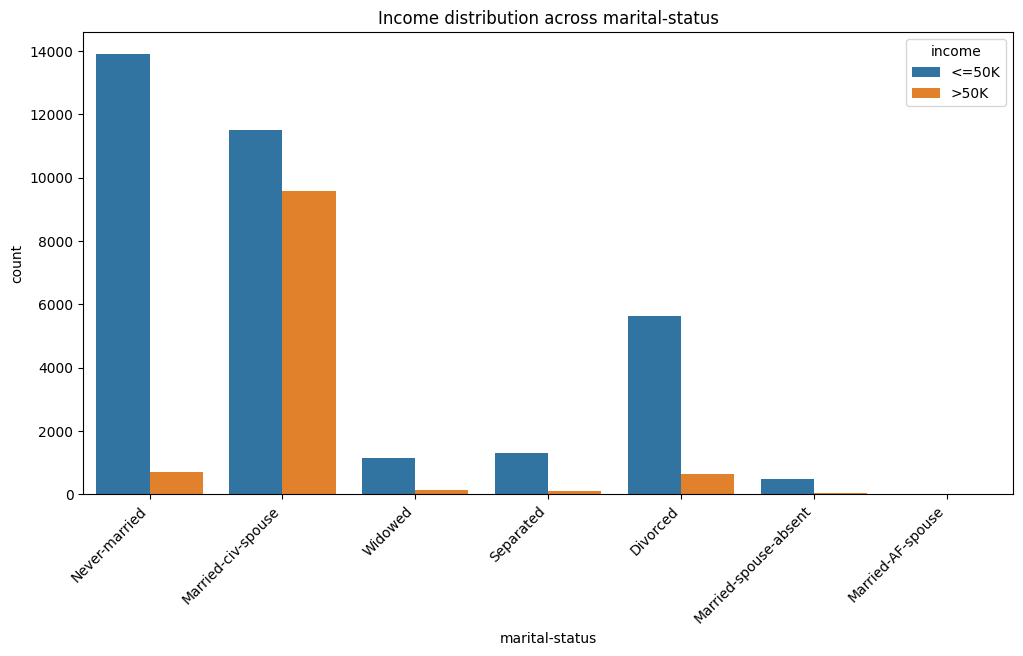

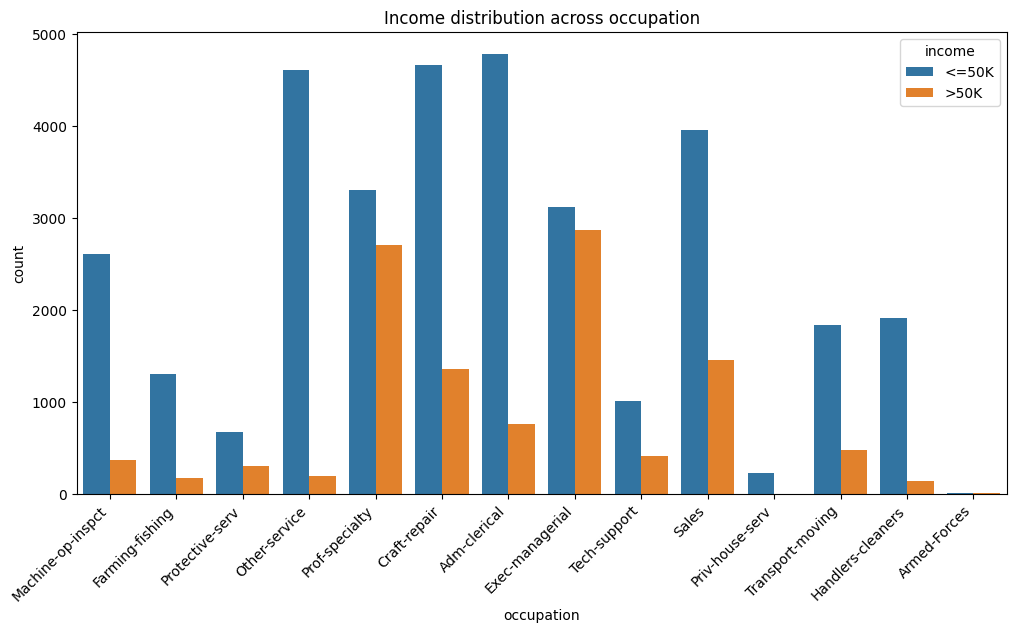

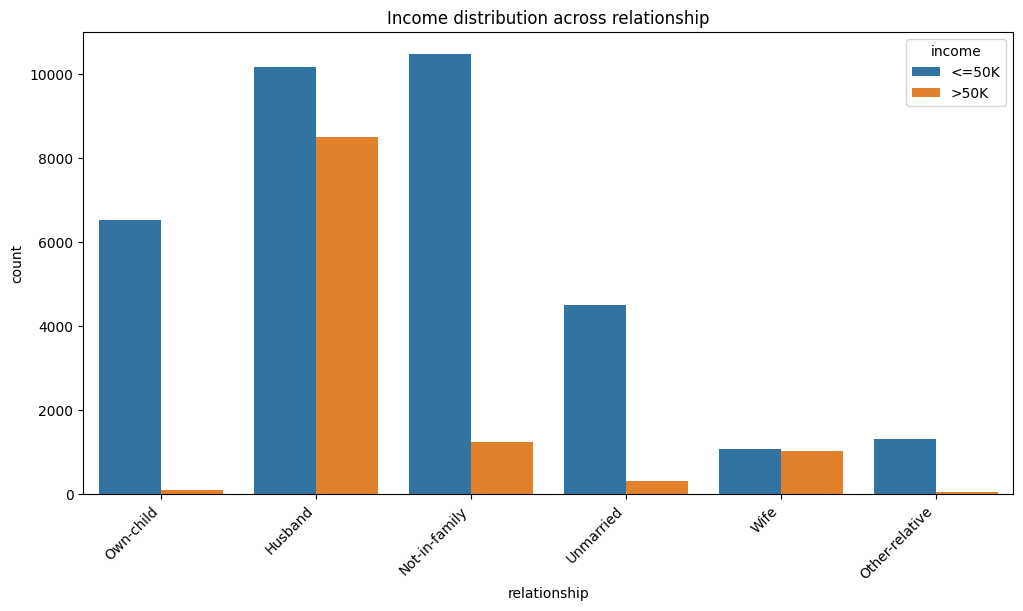

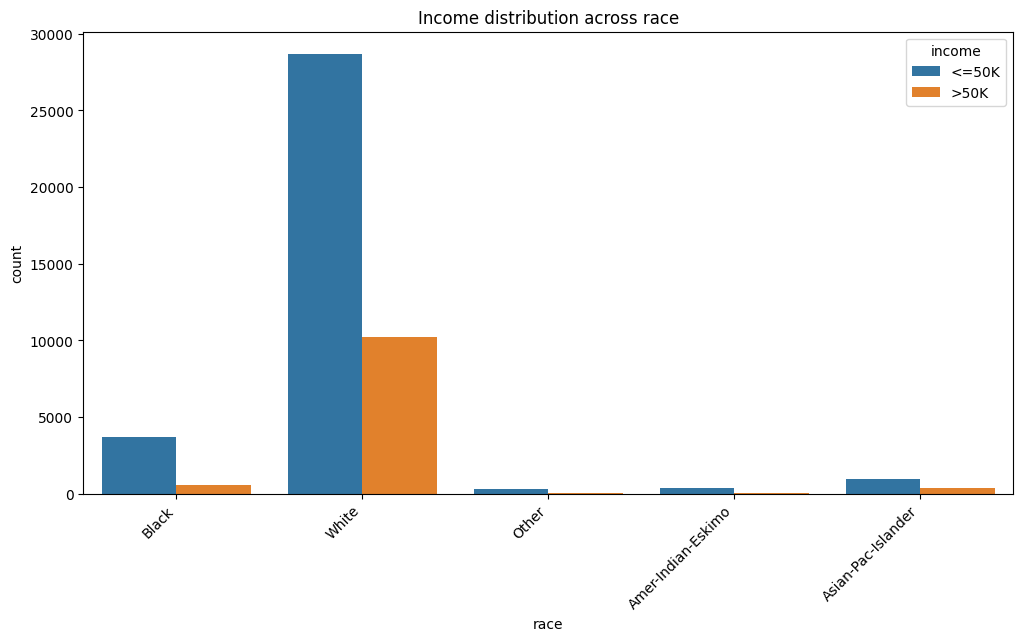

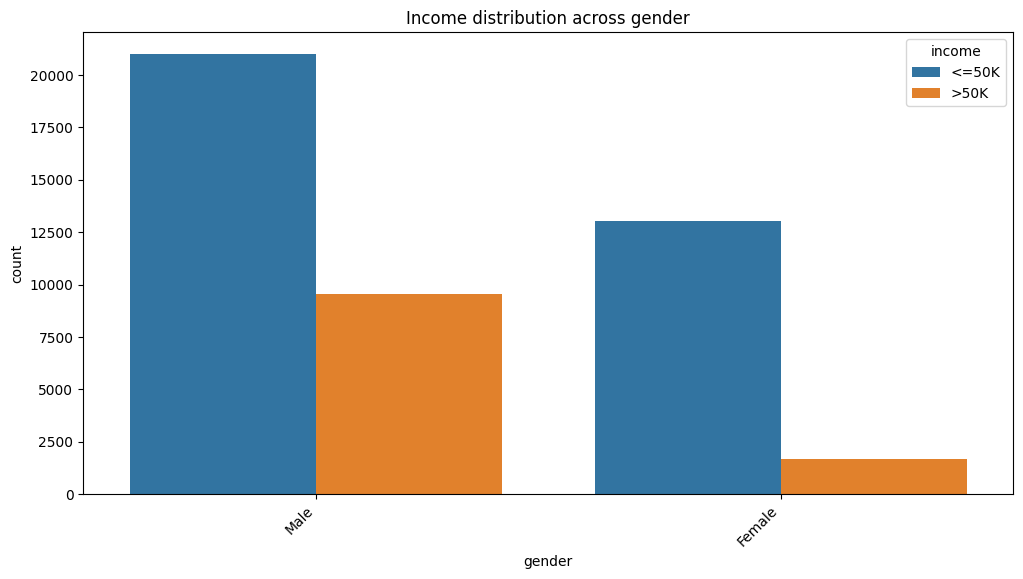

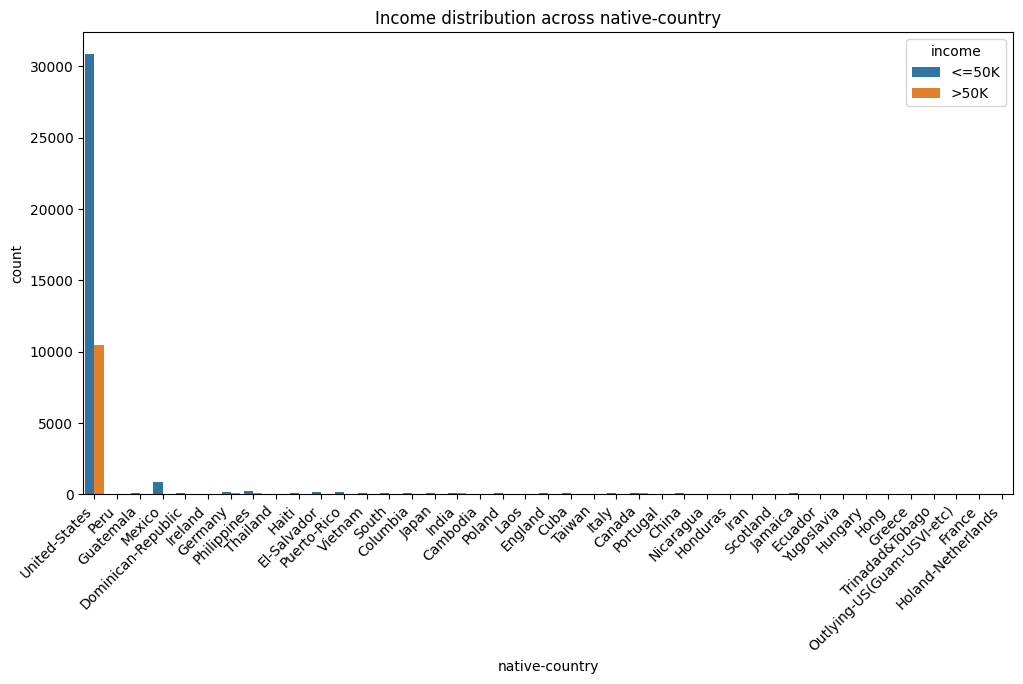

In [100]:
for column in categorical_columns[:-1]:  # 'income' hariç
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataf, x=column, hue='income')
    plt.title(f'Income distribution across {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


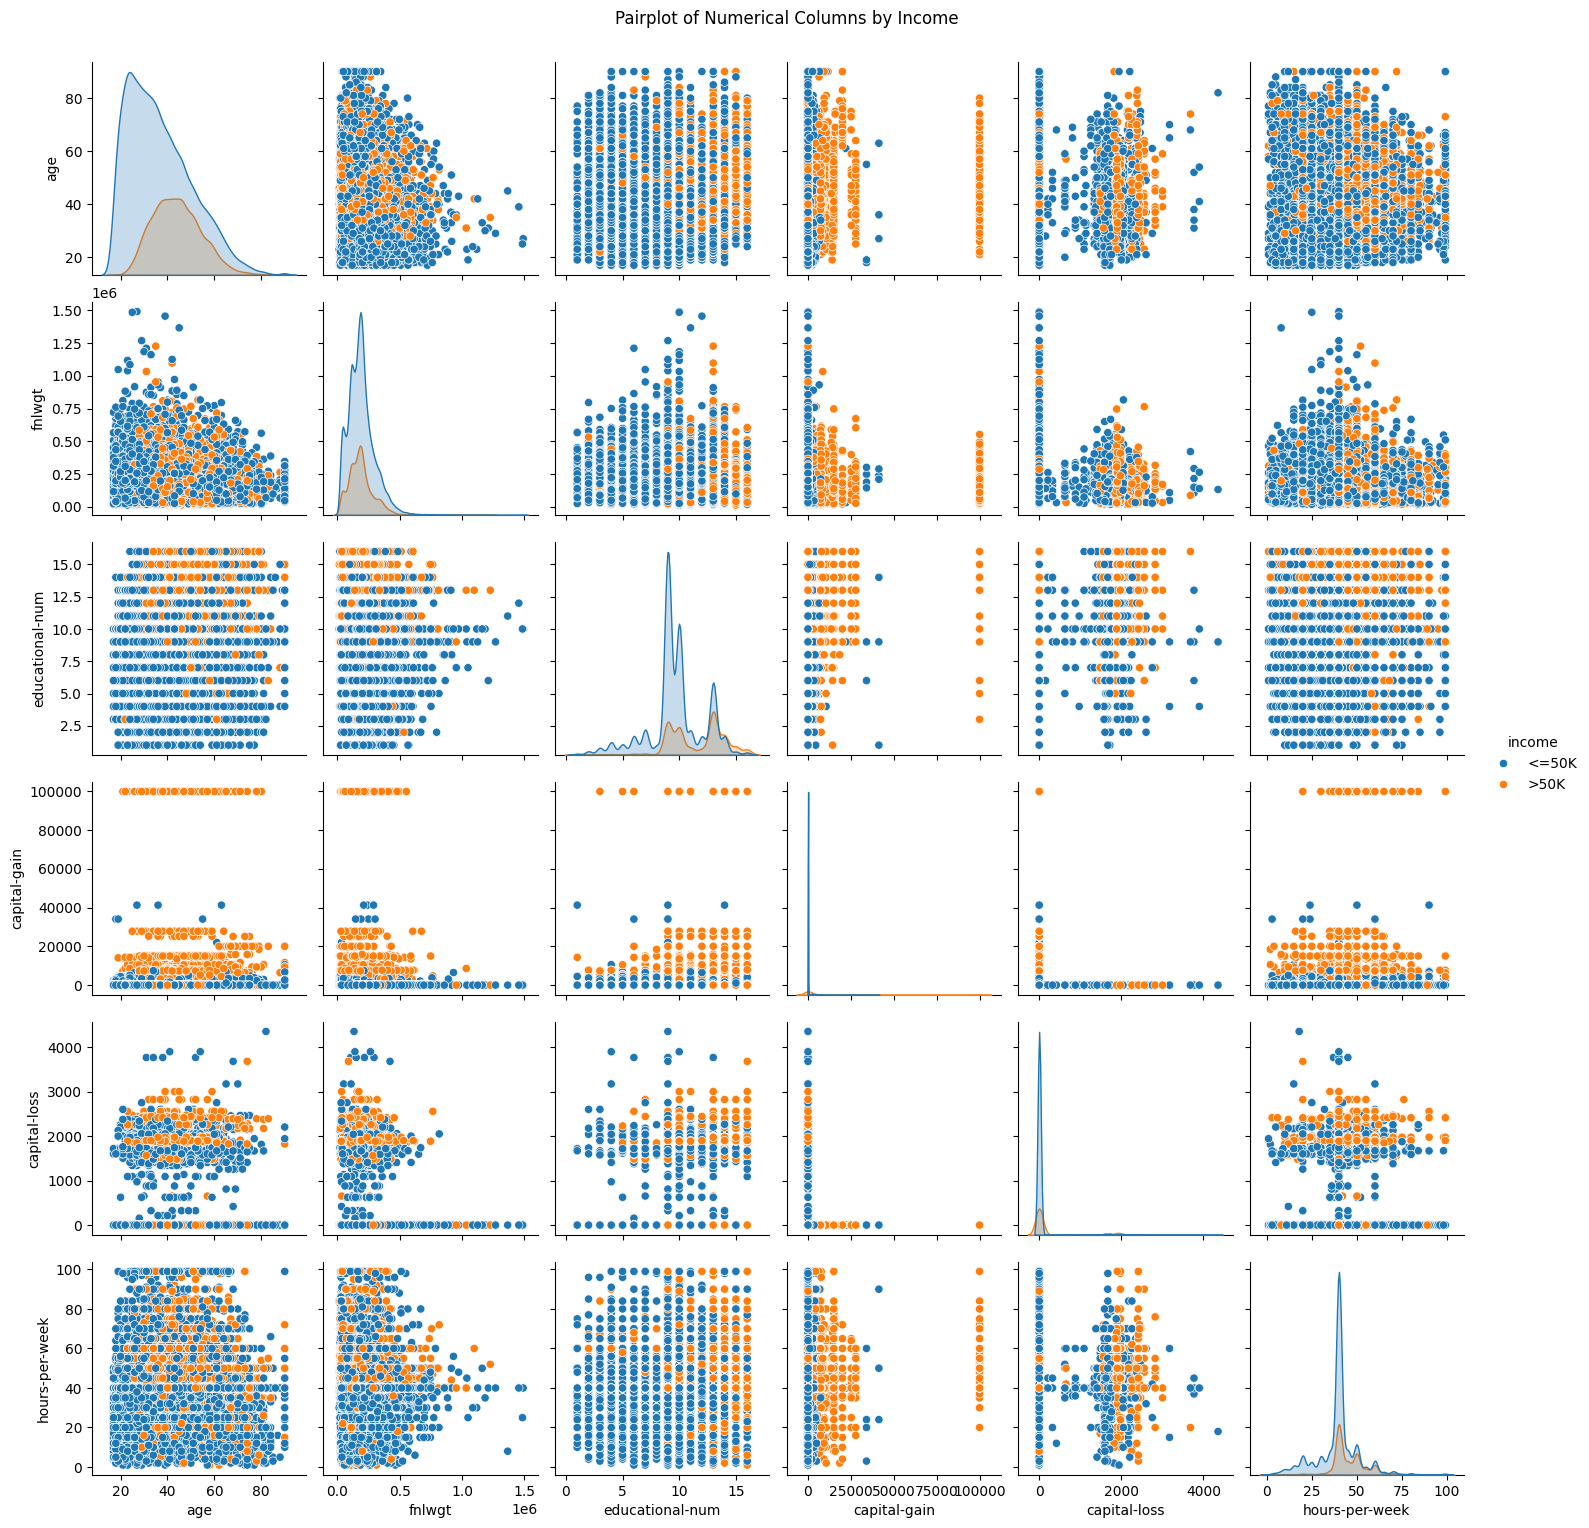

In [101]:
sns.pairplot(dataf, hue='income', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns by Income', y=1.02)
plt.show()


Text(0.5, 0.98, 'Joint Plot of Educational Num and Hours per Week by Income')

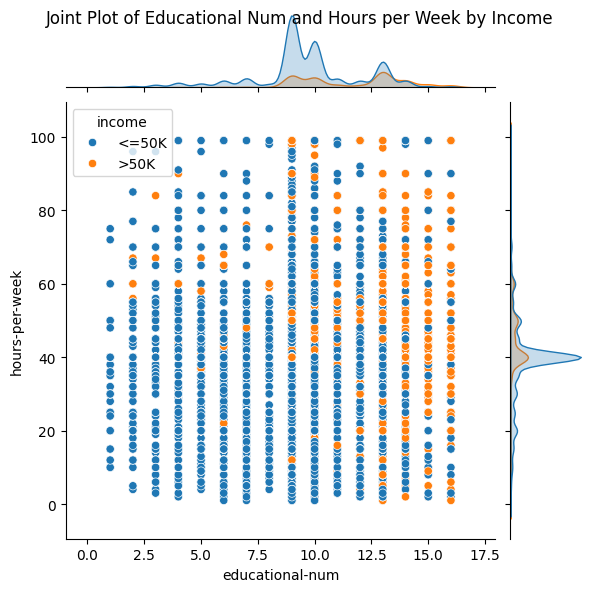

In [102]:
sns.jointplot(data=dataf, x='educational-num', y='hours-per-week', hue='income', kind='scatter')
plt.suptitle('Joint Plot of Educational Num and Hours per Week by Income')


In [109]:
dataf["native-country"].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [105]:
#LABEL ENCODING
encoded_df = dataf.copy()


In [107]:
label_encoder = LabelEncoder()
for column in dataf.columns:
    if dataf[column].dtype == 'object':
        encoded_df[f'{column}_LabelEncoded'] = label_encoder.fit_transform(dataf[column])

encoded_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,income,workclass_LabelEncoded,education_LabelEncoded,marital-status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,race_LabelEncoded,gender_LabelEncoded,native-country_LabelEncoded,income_LabelEncoded
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,<=50K,2,1,4,6,3,2,1,38,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,<=50K,2,11,2,4,0,4,1,38,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,>50K,1,7,2,10,0,4,1,38,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,>50K,2,15,2,6,0,2,1,38,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,<=50K,2,0,4,7,1,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,<=50K,2,7,2,12,5,4,0,38,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,>50K,2,11,2,6,0,4,1,38,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,<=50K,2,11,6,0,4,4,0,38,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,<=50K,2,11,4,0,3,4,1,38,0


In [110]:
n_colums=['age','workclass_LabelEncoded','fnlwgt','educational-num','marital-status_LabelEncoded','occupation_LabelEncoded','relationship_LabelEncoded','race_LabelEncoded','gender_LabelEncoded','native-country_LabelEncoded','income_LabelEncoded']
df=

array([38, 28, 12, 25,  5, 20, 10, 29, 36, 13,  7, 32, 39, 34,  3, 23, 18,
        0, 30, 24,  8,  4, 35, 21,  1, 31,  2, 26, 15, 19, 33, 22,  6, 40,
       17, 16, 11, 37, 27,  9, 14])

In [112]:
encoded_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'workclass_LabelEncoded', 'education_LabelEncoded',
       'marital-status_LabelEncoded', 'occupation_LabelEncoded',
       'relationship_LabelEncoded', 'race_LabelEncoded', 'gender_LabelEncoded',
       'native-country_LabelEncoded', 'income_LabelEncoded'],
      dtype='object')